### How to access DOORS cubes based on model data by UPC

This notebook serves to explain how to access data cubes that have been created based on model data provided by UPC for the Black Sea region. The cubes are accessed using the xcube package. To access the data, the first step is to set up a store that establishes the connection to the s3 bucket hosting the data.

In [1]:
from xcube.core.store import new_data_store

In [2]:
upc_model_store = new_data_store(
    "s3",
    root="doors-cubes/model-data/UPC",
    max_depth=1
)

Next, we can list the data cubes that are stored in this bucket. 

In [3]:
list(upc_model_store.get_data_ids())

['coawst_his_sample_psi.levels',
 'coawst_his_sample_rho.levels',
 'coawst_his_sample_u.levels',
 'coawst_his_sample_v.levels']

We can get a description of the data and open the dataset.

In [4]:
upc_model_store.describe_data('coawst_his_sample_rho.levels')

In [5]:
ds_rho = upc_model_store.open_data('coawst_his_sample_rho.levels')
ds_rho

For purposes of better visualisation, the data is provided as a MultiLevelDataset. We may access the underlying dataset like this:

In [6]:
display(ds_rho.base_dataset)

<xarray.Dataset>
Dimensions:    (time: 1, lat: 461, lon: 650, bnds: 2, s_rho: 15)
Coordinates:
  * lat        (lat) float64 46.53 46.53 46.53 46.52 ... 45.16 45.16 45.15 45.15
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(461, 2), meta=np.ndarray>
  * lon        (lon) float64 29.72 29.72 29.73 29.73 ... 31.66 31.66 31.67 31.67
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(650, 2), meta=np.ndarray>
  * s_rho      (s_rho) float64 -0.9667 -0.9 -0.8333 ... -0.1667 -0.1 -0.03333
  * time       (time) datetime64[ns] 2016-10-05
Dimensions without coordinates: bnds
Data variables: (12/14)
    Dwave      (time, lat, lon) float32 dask.array<chunksize=(1, 461, 650), meta=np.ndarray>
    Dwavep     (time, lat, lon) float32 dask.array<chunksize=(1, 461, 650), meta=np.ndarray>
    Hwave      (time, lat, lon) float32 dask.array<chunksize=(1, 461, 650), meta=np.ndarray>
    Pwave_bot  (time, lat, lon) float32 dask.array<chunksize=(1, 461, 650), meta=np.ndarray>
    Pwave_top  (time, lat, lon) float32 dask.array<chunksize=(1, 461, 650), meta=np.ndarray>
    angle      (lat, lon) float64 dask.array<chunksize=(461, 650), meta=np.ndarray>
    ...         ...
    mask_rho   (lat, lon) float64 dask.array<chunksize=(461, 650), meta=np.ndarray>
    pm         (lat, lon) float64 dask.array<chunksize=(461, 650), meta=np.ndarray>
    pn         (lat, lon) float64 dask.array<chunksize=(461, 650), meta=np.ndarray>
    salt       (time, s_rho, lat, lon) float32 dask.array<chunksize=(1, 1, 461, 650), meta=np.ndarray>
    temp       (time, s_rho, lat, lon) float32 dask.array<chunksize=(1, 1, 461, 650), meta=np.ndarray>
    zeta       (time, lat, lon) float32 dask.array<chunksize=(1, 461, 650), meta=np.ndarray>
Attributes: (12/40)
    CDI:                     Climate Data Interface version 1.9.9rc1 (https:/...
    CDO:                     Climate Data Operators version 1.9.9rc1 (https:/...
    CPP_options:             CSTDNI, ANA_BSFLUX, ANA_BTFLUX, ASSUMED_SHAPE, A...
    Conventions:             CF-1.4, SGRID-0.3
    NLM_LBC:                 \nEDGE:  WEST   SOUTH  EAST   NORTH  \nzeta:  Ch...
    NLM_TADV:                \nADVECTION:   HORIZONTAL   VERTICAL     \ntemp:...
    ...                      ...
    tiling:                  002x002
    time_coverage_end:       2016-10-05T00:00:00
    time_coverage_start:     2016-10-05T00:00:00
    title:                   DNIESTER COASTAL TEST1 rho
    type:                    ROMS/TOMS history file
    var_info:                /home/marc/Models/COAWST_EUROSEA/ROMS/External/v...

We can then visualise a single image ...

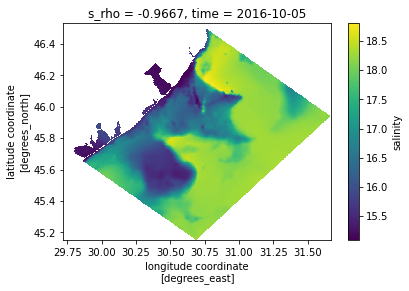

In [7]:
ds_rho.base_dataset.salt.isel(s_rho=0, time=0).plot()

... or a series along a coordinate axis.

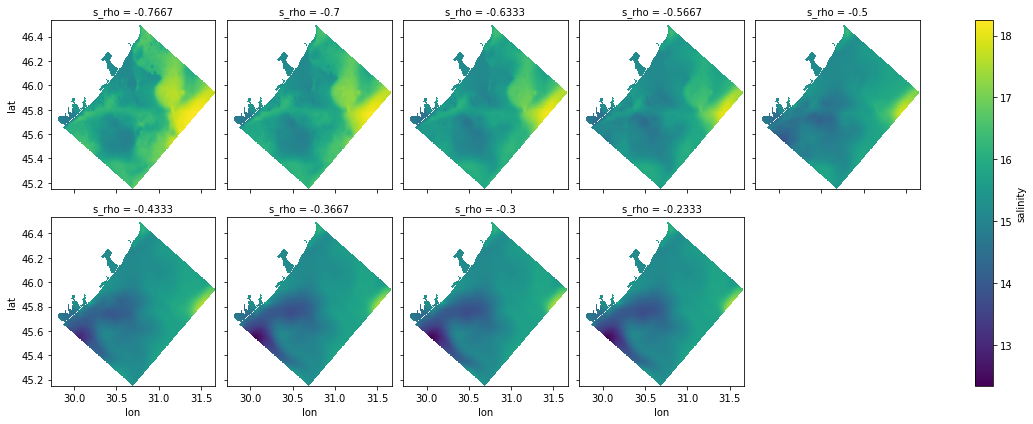

In [8]:
ds_rho.base_dataset.salt.isel(time=0).sel({'s_rho': slice(-0.8, -0.2)}).plot.imshow(col='s_rho', col_wrap=5)